## Lab 8: KOH1: Podstawowa sieć Kohonena (2 tygodnie, 2 punkty)
Zaimplementować sieć Kohonena złożoną z neuronów w prostokątnej siatce $M×N$ (M,N są parametrami programu), która działa dla zbioru wektorów (wszystkich o tej samej długości).

Zaimplementować następujące funkcje sąsiedztwa:
- funkcję gaussowską
- minus druga pochodną funkcji gaussowskiej.

W obu implementacjach dodać możliwość zmiany szerokości sąsiedztwa z użyciem parametru (technicznie oznacza to przemnożenie argumentu x przez stałą) i sprawdzić dla kilku wartości z przedziału $[0.1, 1]$.

Jako funkcji wygaszającą uczenie wraz z kolejnymi iteracjami użyć funkcji $ \alpha (t) = e^{-\frac{t}{\lambda}} $.

Przetestować działanie sieci na dostarczonych prostych zbiorach danych:
- danych 2d skupionych w wierzchołkach sześciokąta,
- danych 3d skupionych w wierzchołkach sześcianu.

Dane, odpowiednio hexagon i cube, mają 3/4 kolumny. Do sieci podać tylko kolumny x, y i z (w przypadku
sześciokąta bez z). Ostatnia kolumna, c, zawiera identyfikator wierzchołka bryły/figury. 

Czy klastry w odwzorowaniu znalezionym przez sieć pokrywają się w liczbą klastrów w faktycznych danych? 

Czy znalezione klastry pokrywają się z identyfikatorami wierzchołków?

## TODO:
- ~~implement rectangle Kohonen network~~
- implement hexagon Kohonen network
- ~~implement gaussian neighborhood function~~
- ~~implement minus gaussian neighborhood second derivative function~~
- ~~implement decreasing learning rate~~
- test clustering on simple 2d data
- test clustering on simple 3d data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SelfOrganizingMap as SOM

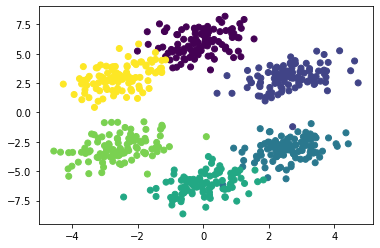

          x         y  c
0  2.402047  3.728695  1
1 -0.660032  7.047206  0
2  2.202839 -2.394303  2
3  3.179183  2.593885  1
4  3.173320 -2.152688  2


In [2]:
df_train = pd.read_csv('data/hexagon.csv')
plt.scatter(df_train['x'], df_train['y'], c=df_train['c'])
plt.show()
print(df_train.head())


x_train = df_train[["x","y"]].to_numpy()
y_train = df_train[["c"]].to_numpy()

In [3]:
data = np.array(x_train)

In [4]:
som = SOM.SelfOrganizingMap(7,7,2)
som.init_weights()
print("Training...")
som.train(data=data, epochs=100,neighbourhood_scaler=0.5, learning_rate=0.3)
print("\n...ready!")

Training...

...ready!


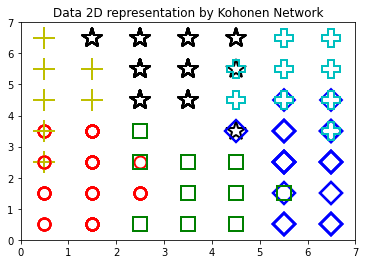

In [11]:
from pylab import plot,axis,show,pcolor,colorbar,bone
# bone()
t = y_train
# use different colors and markers for each label
markers = ['o','s','D',"P","*","+"]
colors = ['r','g','b','c','k','y']
for cnt,xx in enumerate(data):
 w = som.winner_for_sample(xx)
 # palce a marker on the winning position for the sample xx
 plot(w[0]+.5,w[1]+.5,markers[t[cnt][0]],markerfacecolor='None',
   markeredgecolor=colors[t[cnt][0]],markersize=12+t[cnt]*2,markeredgewidth=2)
axis([0,som.weights.shape[0],0,som.weights.shape[1]])
plt.title("Data 2D representation by Kohonen Network")
show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96d48dca-8d08-48ed-b693-a040059620ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>